<a href="https://colab.research.google.com/github/jeffveleze/housing_price/blob/master/housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
# Preparing colab to use drive
from google.colab import drive

# Mount colab in drive (Requires authorization)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

In [0]:
# Importing libraries
import sklearn
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
%matplotlib inline

# DataFrames visualization
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Downloading "Housing Price" dataset 

In [0]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def download_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True) # Creating directory
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path) # Downloading data
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path) # Dataset extraction
    housing_tgz.close()
  
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    dataset = pd.read_csv(csv_path) # Loading in memory as pd.DataFrame
    return dataset

In [153]:
# Download data and make sure it's there
download_housing_data()
housing_data = load_housing_data(housing_path=HOUSING_PATH)
housing_data.head()
print("Shape: ", housing_data.shape)

Shape:  (20640, 10)


### Exploring Dataset

In [157]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [158]:
housing_data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [161]:
housing_data.ocean_proximity.value_counts() # Count elements in categorical variable

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Preprocessing Train Data

### Scaling



In [0]:
# Separating depending variable (Y) from independent variables (X)
X_df = housing_data.drop('median_house_value', axis=1).copy()
Y_df = housing_data['median_house_value'].copy()

In [0]:
from sklearn.model_selection import train_test_split

# Split dataset by train and test in a random way
X_train_original, X_test_original, Y_train_original, Y_test_original = train_test_split(X_df, Y_df, test_size=0.2, random_state=2)

In [0]:
# Avoiding SettingWithCopyWarning
X_train = X_train_original.copy()
X_test = X_test_original.copy()
Y_train = Y_train_original.copy()
Y_test = Y_test_original.copy()

In [169]:
print(X_train.shape)
X_train.head()

(16512, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,INLAND
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,<1H OCEAN
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,INLAND
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,<1H OCEAN
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,INLAND


In [170]:
print(X_test.shape)
X_test.head()

(4128, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
10385,-117.65,33.60,15.0,5736.0,NaN,2529.0,762.0,6.4114,<1H OCEAN
1943,-120.91,38.62,12.0,4545.0,748.0,2033.0,718.0,4.1843,INLAND
7490,-118.23,33.93,35.0,1149.0,277.0,909.0,214.0,1.7411,<1H OCEAN
16889,-122.37,37.59,39.0,4645.0,1196.0,2156.0,1113.0,3.4412,NEAR OCEAN
11416,-117.98,33.70,16.0,5127.0,631.0,2142.0,596.0,7.8195,<1H OCEAN


In [0]:
from sklearn.preprocessing import (PowerTransformer, StandardScaler, 
                                   MinMaxScaler, LabelEncoder, OneHotEncoder)

In [176]:
# Make sure all values are bigger than 0 to be able to make "box cox" transformation to "population" column
(X_train["population"]>0).sum() == len(X_train)

True

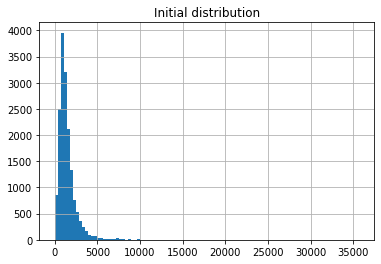

In [173]:
X_train["population"].hist(bins=100)
plt.title("Population Initial Distribution")
plt.show()

In [177]:
# Running box-cox transformation
box_cox = PowerTransformer(method='box-cox') # Create box-cox object
box_cox.fit(X_train["population"].values.reshape(-1,1)) # We reshape(-1,1) because the array needs to have at least 2 dimensions
X_train.loc[:,"population"] = box_cox.transform(X_train["population"].values.reshape(-1,1)) # Updating the array with transformed data
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2072,-119.84,36.77,6.0,1853.0,473.0,0.223324,417.0,1.4817,INLAND
10600,-117.80,33.68,8.0,2032.0,349.0,-0.452278,340.0,6.9133,<1H OCEAN
2494,-120.19,36.60,25.0,875.0,214.0,-0.349517,214.0,1.5536,INLAND
4284,-118.32,34.10,31.0,622.0,229.0,-0.918091,227.0,1.5284,<1H OCEAN
16541,-121.23,37.79,21.0,1922.0,373.0,-0.082775,372.0,4.0815,INLAND


In [178]:
box_cox.lambdas_ # Learned Lambdas

array([0.23107515])

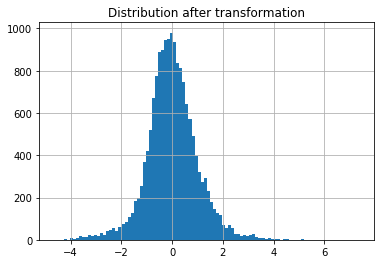

In [179]:
X_train["population"].hist(bins=100)
plt.title("Population Distribution After Transformation")
plt.show()

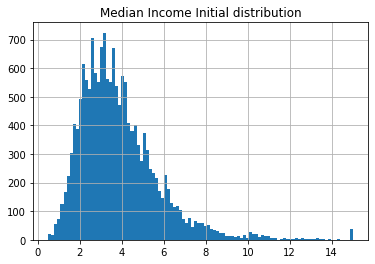

In [183]:
X_train['median_income'].hist(bins=100)
plt.title("Median Income Initial distribution")
plt.show()

In [0]:
sc_median_income = StandardScaler()
sc_median_income.fit(X_train.loc[:,'median_income'].values.reshape(-1,1))
X_train.loc[:,'median_income'] = sc_median_income.transform(X_train['median_income'].values.reshape(-1,1))

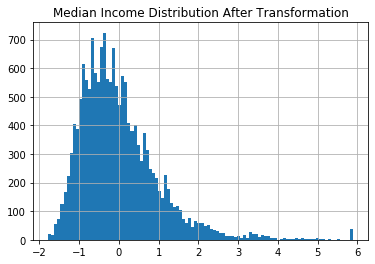

In [189]:
X_train['median_income'].hist(bins=100)
plt.title("Median Income Distribution After Transformation")
plt.show()

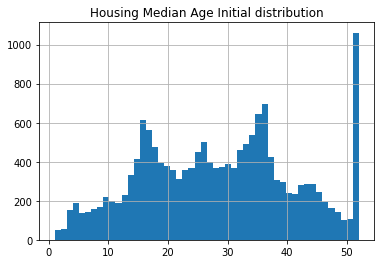

In [190]:
X_train['housing_median_age'].hist(bins=50)
plt.title("Housing Median Age Initial distribution")
plt.show()

In [0]:
min_max_housing_median = MinMaxScaler()
min_max_housing_median.fit(X_train['housing_median_age'].values[:,None])
X_train['housing_median_age'] = min_max_housing_median.transform(X_train['housing_median_age'].values[:,None])

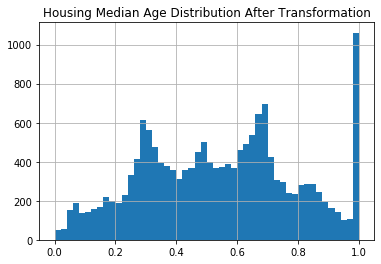

In [193]:
X_train['housing_median_age'].hist(bins=50)
plt.title("Housing Median Age Distribution After Transformation")
plt.show()

In [195]:
# Additional transformations to remaining columns
cols2scale = ['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'households']
se_cols2scale = StandardScaler()
se_cols2scale.fit(X_train[cols2scale])
X_train[cols2scale] = se_cols2scale.transform(X_train[cols2scale])
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2072,-0.137635,0.534564,0.098039,-0.357368,-0.155975,0.223324,-0.218173,-1.258403,INLAND
10600,0.879836,-0.909979,0.137255,-0.276515,-0.447606,-0.452278,-0.417841,1.610623,<1H OCEAN
2494,-0.312201,0.455091,0.470588,-0.799127,-0.765107,-0.349517,-0.744572,-1.220425,INLAND
4284,0.620480,-0.713633,0.588235,-0.913406,-0.729829,-0.918091,-0.710862,-1.233736,<1H OCEAN
16541,-0.830911,1.011403,0.392157,-0.326201,-0.391161,-0.082775,-0.334862,0.114837,INLAND


### Encoding

In [194]:
print("Classes: ", X_train['ocean_proximity'].unique()) # Categorical classes
X_train.head()

Classes:  ['INLAND' '<1H OCEAN' 'NEAR OCEAN' 'NEAR BAY' 'ISLAND']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2072,-119.84,36.77,0.098039,1853.0,473.0,0.223324,417.0,-1.258403,INLAND
10600,-117.80,33.68,0.137255,2032.0,349.0,-0.452278,340.0,1.610623,<1H OCEAN
2494,-120.19,36.60,0.470588,875.0,214.0,-0.349517,214.0,-1.220425,INLAND
4284,-118.32,34.10,0.588235,622.0,229.0,-0.918091,227.0,-1.233736,<1H OCEAN
16541,-121.23,37.79,0.392157,1922.0,373.0,-0.082775,372.0,0.114837,INLAND


In [0]:
# Run a label encoder to transform categorical variables into numerical variables
le_ocean_proximity = LabelEncoder()
le_ocean_proximity.fit(X_train['ocean_proximity'])
X_train['ocean_proximity'] = le_ocean_proximity.transform(X_train['ocean_proximity'])

In [197]:
# Verifying that works
print("Classes: ", X_train['ocean_proximity'].unique())
X_train.head()

Classes:  [1 0 4 3 2]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2072,-0.137635,0.534564,0.098039,-0.357368,-0.155975,0.223324,-0.218173,-1.258403,1
10600,0.879836,-0.909979,0.137255,-0.276515,-0.447606,-0.452278,-0.417841,1.610623,0
2494,-0.312201,0.455091,0.470588,-0.799127,-0.765107,-0.349517,-0.744572,-1.220425,1
4284,0.620480,-0.713633,0.588235,-0.913406,-0.729829,-0.918091,-0.710862,-1.233736,0
16541,-0.830911,1.011403,0.392157,-0.326201,-0.391161,-0.082775,-0.334862,0.114837,1


In [198]:
le_ocean_proximity.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [0]:
# Run a one hot encoding transformer to 'transform' numerical variable into multiple binary variables
ohe_ocean_proximity = OneHotEncoder()
ohe_ocean_proximity.fit(X_train["ocean_proximity"].values[:,None])
out = ohe_ocean_proximity.transform(X_train["ocean_proximity"].values[:,None])

# Add a new column for evey category created
out_array = out.toarray()
ohe_cols_op = []
for category in ohe_ocean_proximity.categories_[0]:
  current_class = le_ocean_proximity.classes_[int(category)]
  col_add = "op_" + current_class
  ohe_cols_op.append(col_add)
  X_train[col_add] = out_array[:,int(category)]

# Drop existent numerical ocean_proximity column
X_train = X_train.drop("ocean_proximity", axis =1)

In [200]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
2072,-0.137635,0.534564,0.098039,-0.357368,-0.155975,0.223324,-0.218173,-1.258403,0.0,1.0,0.0,0.0,0.0
10600,0.879836,-0.909979,0.137255,-0.276515,-0.447606,-0.452278,-0.417841,1.610623,1.0,0.0,0.0,0.0,0.0
2494,-0.312201,0.455091,0.470588,-0.799127,-0.765107,-0.349517,-0.744572,-1.220425,0.0,1.0,0.0,0.0,0.0
4284,0.620480,-0.713633,0.588235,-0.913406,-0.729829,-0.918091,-0.710862,-1.233736,1.0,0.0,0.0,0.0,0.0
16541,-0.830911,1.011403,0.392157,-0.326201,-0.391161,-0.082775,-0.334862,0.114837,0.0,1.0,0.0,0.0,0.0


### Missing Values

In [204]:
from sklearn.impute import SimpleImputer

# Looking for NaNs
X_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
op_<1H OCEAN            0
op_INLAND               0
op_ISLAND               0
op_NEAR BAY             0
op_NEAR OCEAN           0
dtype: int64

In [0]:
# Completing missing values with median 
si_total_bedrooms = SimpleImputer(strategy='median')
si_total_bedrooms.fit(X_train["total_bedrooms"].values[:,None])
X_train["total_bedrooms"] = si_total_bedrooms.transform(X_train["total_bedrooms"].values[:,None])

In [207]:
# Verifying that works
X_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
op_<1H OCEAN          0
op_INLAND             0
op_ISLAND             0
op_NEAR BAY           0
op_NEAR OCEAN         0
dtype: int64

In [208]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
2072,-0.137635,0.534564,0.098039,-0.357368,-0.155975,0.223324,-0.218173,-1.258403,0.0,1.0,0.0,0.0,0.0
10600,0.879836,-0.909979,0.137255,-0.276515,-0.447606,-0.452278,-0.417841,1.610623,1.0,0.0,0.0,0.0,0.0
2494,-0.312201,0.455091,0.470588,-0.799127,-0.765107,-0.349517,-0.744572,-1.220425,0.0,1.0,0.0,0.0,0.0
4284,0.620480,-0.713633,0.588235,-0.913406,-0.729829,-0.918091,-0.710862,-1.233736,1.0,0.0,0.0,0.0,0.0
16541,-0.830911,1.011403,0.392157,-0.326201,-0.391161,-0.082775,-0.334862,0.114837,0.0,1.0,0.0,0.0,0.0


## Preprocessing Test Data

### Scaling

In [209]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
10385,-117.65,33.60,15.0,5736.0,NaN,2529.0,762.0,6.4114,<1H OCEAN
1943,-120.91,38.62,12.0,4545.0,748.0,2033.0,718.0,4.1843,INLAND
7490,-118.23,33.93,35.0,1149.0,277.0,909.0,214.0,1.7411,<1H OCEAN
16889,-122.37,37.59,39.0,4645.0,1196.0,2156.0,1113.0,3.4412,NEAR OCEAN
11416,-117.98,33.70,16.0,5127.0,631.0,2142.0,596.0,7.8195,<1H OCEAN


In [211]:
# Using same objects created to transform train data with the purpose of performing same operations with same values to test data
X_test['population'] = box_cox.transform(X_test['population'].values[:,None])
X_test['median_income'] = sc_median_income.transform(X_test['median_income'].values[:,None])
X_test['housing_median_age'] = min_max_housing_median.transform(X_test['housing_median_age'].values[:,None])
X_test[cols2scale] = se_cols2scale.transform(X_test[cols2scale])

X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
10385,0.954649,-0.947378,0.274510,1.396566,NaN,1.164000,0.676446,1.345514,<1H OCEAN
1943,-0.671308,1.399419,0.215686,0.858597,0.490788,0.802898,0.562350,0.169137,INLAND
7490,0.665369,-0.793107,0.666667,-0.675362,-0.616940,-0.381626,-0.744572,-1.121385,<1H OCEAN
16889,-1.399497,0.917905,0.745098,0.903766,1.544423,0.898277,1.586624,-0.223375,NEAR OCEAN
11416,0.790059,-0.900629,0.294118,1.121484,0.215620,0.887635,0.245992,2.089287,<1H OCEAN


### Encoding

In [0]:
# Using same objects created to transform train data
X_test["ocean_proximity"] = le_ocean_proximity.transform(X_test["ocean_proximity"])

temp_test = ohe_ocean_proximity.transform(X_test["ocean_proximity"].values[:,None]).toarray()
for idx, col in enumerate(ohe_cols_op):
  X_test[col] = temp_test[:,idx]

X_test = X_test.drop("ocean_proximity", axis=1)

In [214]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
10385,0.954649,-0.947378,0.274510,1.396566,NaN,1.164000,0.676446,1.345514,1.0,0.0,0.0,0.0,0.0
1943,-0.671308,1.399419,0.215686,0.858597,0.490788,0.802898,0.562350,0.169137,0.0,1.0,0.0,0.0,0.0
7490,0.665369,-0.793107,0.666667,-0.675362,-0.616940,-0.381626,-0.744572,-1.121385,1.0,0.0,0.0,0.0,0.0
16889,-1.399497,0.917905,0.745098,0.903766,1.544423,0.898277,1.586624,-0.223375,0.0,0.0,0.0,0.0,1.0
11416,0.790059,-0.900629,0.294118,1.121484,0.215620,0.887635,0.245992,2.089287,1.0,0.0,0.0,0.0,0.0


### Missing Values

In [220]:
X_test["total_bedrooms"] = si_total_bedrooms.transform(X_test["total_bedrooms"].values[:,None])
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
10385,0.954649,-0.947378,0.274510,1.396566,-0.245345,1.164000,0.676446,1.345514,1.0,0.0,0.0,0.0,0.0
1943,-0.671308,1.399419,0.215686,0.858597,0.490788,0.802898,0.562350,0.169137,0.0,1.0,0.0,0.0,0.0
7490,0.665369,-0.793107,0.666667,-0.675362,-0.616940,-0.381626,-0.744572,-1.121385,1.0,0.0,0.0,0.0,0.0
16889,-1.399497,0.917905,0.745098,0.903766,1.544423,0.898277,1.586624,-0.223375,0.0,0.0,0.0,0.0,1.0
11416,0.790059,-0.900629,0.294118,1.121484,0.215620,0.887635,0.245992,2.089287,1.0,0.0,0.0,0.0,0.0


In [0]:
assert (X_test.columns.values == X_train.columns.values).all() # Assert to validate that columns match

In [222]:
X_test.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
10385,0.954649,-0.947378,0.274510,1.396566,-0.245345,1.164000,0.676446,1.345514,1.0,0.0,0.0,0.0,0.0
1943,-0.671308,1.399419,0.215686,0.858597,0.490788,0.802898,0.562350,0.169137,0.0,1.0,0.0,0.0,0.0
7490,0.665369,-0.793107,0.666667,-0.675362,-0.616940,-0.381626,-0.744572,-1.121385,1.0,0.0,0.0,0.0,0.0
16889,-1.399497,0.917905,0.745098,0.903766,1.544423,0.898277,1.586624,-0.223375,0.0,0.0,0.0,0.0,1.0
11416,0.790059,-0.900629,0.294118,1.121484,0.215620,0.887635,0.245992,2.089287,1.0,0.0,0.0,0.0,0.0
10297,0.839935,-0.797781,0.235294,0.292622,0.441399,0.393474,0.510488,0.841390,1.0,0.0,0.0,0.0,0.0
16843,-1.434410,0.936605,0.666667,1.115160,0.987031,1.461824,1.200252,0.474549,0.0,0.0,0.0,0.0,1.0
11528,0.740183,-0.867905,0.490196,-0.285097,0.027471,-0.787255,0.022985,-0.841592,1.0,0.0,0.0,0.0,0.0
18951,-1.239894,1.226448,0.705882,-0.590895,-0.678088,-0.757523,-0.700489,-0.025930,0.0,1.0,0.0,0.0,0.0
3728,0.565617,-0.676234,0.588235,-0.102612,-0.068956,-0.118002,0.015206,0.014002,1.0,0.0,0.0,0.0,0.0


## Creating Models

### Linear Regression

In [223]:
from sklearn.linear_model import LinearRegression 

# Creating linear regression object
lin_reg = LinearRegression()

# Train model
lin_reg.fit(X_train, Y_train)

(218634.11073360962,
 array([-52495.91369884, -53155.10657095,  50429.68785319, -22552.14697336,
         38593.19668165, -25639.75636159,  13231.0826454 ,  75489.72342041,
        -26848.27451777, -67985.99384318, 144821.68912966, -28340.58015854,
        -21646.84061016]))

In [0]:
# Predicting with test data
Y_test_lr_prediction = lin_reg.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [235]:
# Calculating model performance metrics
mse = mean_squared_error(Y_test, Y_test_lr_prediction)
mae = mean_absolute_error(Y_test, Y_test_lr_prediction)
r2 = r2_score(Y_test, Y_test_estimate)

print("Mean Square Error (MSE)= {:.2f}".format(mse))
print("Mean Absolute Error (MAE)= {:.2f}".format(mae))
print("R_2 = {:.3f}".format(r2))

Mean Square Error (MSE)= 4912780167.18
Mean Absolute Error (MAE)= 50696.77
R_2 = 0.635


### Stochastic Gradient Descent

In [231]:
from sklearn.linear_model import SGDRegressor

# Creating parameters dictionary
params = dict(loss='squared_loss', 
              max_iter=500, 
              tol=0.001, 
              shuffle=True, 
              verbose=0,
              random_state=42, 
              learning_rate='invscaling')

# Creating models
sgd_linear_model = SGDRegressor(**params)

# Training model
sgd_linear_model.fit(X_train, Y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=500,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [0]:
# Predicting with test data
Y_test_sdg_prediction = sgd_linear_model.predict(X_test)

In [238]:
# Calculating model performance metrics
mse = mean_squared_error(Y_test, Y_test_sdg_prediction)
mae = mean_absolute_error(Y_test, Y_test_sdg_prediction)
r2 = r2_score(Y_test, Y_test_sdg_prediction)

print("Mean Square Error (MSE)= {:.2f}".format(mse))
print("Mean Absolute Error (MAE)= {:.2f}".format(mae))
print("R_2 = {:.3f}".format(r2))

Mean Square Error (MSE)= 4932319997.97
Mean Absolute Error (MAE)= 50382.51
R_2 = 0.634


In [243]:
# Looking for learned parameters in lr model
lin_reg.intercept_, lin_reg.coef_

(218634.11073360962,
 array([-52495.91369884, -53155.10657095,  50429.68785319, -22552.14697336,
         38593.19668165, -25639.75636159,  13231.0826454 ,  75489.72342041,
        -26848.27451777, -67985.99384318, 144821.68912966, -28340.58015854,
        -21646.84061016]))

In [242]:
# Looking for learned parameters in sgd model
sgd_linear_model.intercept_, sgd_linear_model.coef_

(array([147860.41730497]),
 array([-52963.39151   , -52775.29146575,  49955.90316313, -21365.45516548,
         39955.58623401, -24561.16210846,  14373.51999843,  75652.64077557,
         42396.69561896,   1443.45579472,  11524.04066445,  41318.7804664 ,
         47878.97914527]))

## Learning Curves

In [0]:
# Pipeline to Transform Original DataFrame

# Scaling
X_df['population'] = box_cox.transform(X_df['population'].values[:,None])
X_df['median_income'] = sc_median_income.transform(X_df['median_income'].values[:,None])
X_df['housing_median_age'] = min_max_housing_median.transform(X_df['housing_median_age'].values[:,None])
X_df["ocean_proximity"] = le_ocean_proximity.transform(X_df["ocean_proximity"])
X_df[cols2scale] = se_cols2scale.transform(X_df[cols2scale])

# Encoding
temp_df = ohe_ocean_proximity.transform(X_df["ocean_proximity"].values[:,None]).toarray()
for idx, col in enumerate(ohe_cols_op):
  X_df[col] = temp_df[:,idx]
X_df = X_df.drop("ocean_proximity", axis=1)

# Missing Values
X_df["total_bedrooms"] = si_total_bedrooms.transform(X_df["total_bedrooms"].values[:,None])

### Stochastic Gradient Descent

In [0]:
# Creating regressor
sgd_regressor_for_lc = SGDRegressor(**params)

In [0]:
from sklearn.model_selection import learning_curve

# Creating learning curve object
train_sizes, train_scores, test_scores = learning_curve(sgd_regressor_for_lc, 
                                                        X_df, 
                                                        Y_df, 
                                                        cv=5, 
                                                        n_jobs=4, 
                                                        train_sizes=[0.4, 0.6, 0.8], 
                                                        scoring='r2')

# Calculating mean and standar deviation of scores calculated in every model iteration
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

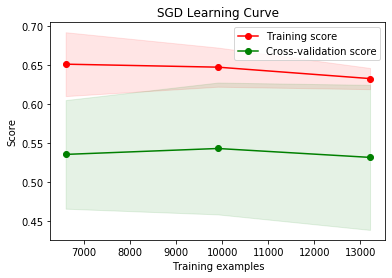

In [256]:
plt.figure()

plt.title("SGD Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1,
                 color="r")

plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, 
                 color="g")

plt.plot(train_sizes, 
         train_scores_mean, 
         'o-', 
         color="r",
         label="Training score")

plt.plot(train_sizes, 
         test_scores_mean, 
         'o-', 
         color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

### Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
# Creating regressor
random_forest_regressor_for_lc = RandomForestRegressor()

In [0]:
# Creating learning curve object
train_sizes, train_scores, test_scores = learning_curve(random_forest_regressor_for_lc, 
                                                        X_df, 
                                                        Y_df, 
                                                        cv=3, 
                                                        n_jobs=2, 
                                                        train_sizes=[0.4, 0.6, 0.8], 
                                                        scoring='r2')

# Calculating mean and standar deviation of scores calculated in every model iteration
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

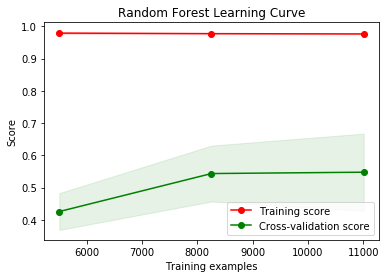

In [262]:
plt.figure()

plt.title("Random Forest Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1,
                 color="r")

plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, 
                 color="g")

plt.plot(train_sizes, 
         train_scores_mean, 
         'o-', 
         color="r",
         label="Training score")

plt.plot(train_sizes, 
         test_scores_mean, 
         'o-', 
         color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

## Creating a Pipeline

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, FeatureUnion, Pipeline
from sklearn.preprocessing import (PowerTransformer, StandardScaler, 
                                   MinMaxScaler, OneHotEncoder)
from sklearn.compose import TransformedTargetRegressor

In [0]:
# Adding a helper class to select columns
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)

In [0]:
# Separating depending variable (Y) from independent variables (X)
X_df = housing_data.drop('median_house_value', axis=1).copy()
Y_df = housing_data['median_house_value'].copy()

In [0]:
# Splitting data set into training/test
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_df.copy(), Y_df.copy(), test_size=0.2, random_state=2)

In [0]:
# Population Transform
population_pre = ('population_pre', Pipeline([('selector', ColumnSelector(['population'])),
                                              ('box_cox', PowerTransformer(method='box-cox', 
                                                                           standardize=True))]))
# Standard Scaler Transform
columns_se_pre = ['longitude', 'latitude', 'total_rooms', 'households', 'median_income']
standard_scaler_pre = ('standard_scaler_pre', Pipeline([('selector', ColumnSelector(columns_se_pre)),
                                                        ('ss', StandardScaler())]))
# MinMax Scaler Transform
columns_minmax_pre = ['housing_median_age']
minmax_scaler_pre = ('minmax_scaler_pre', Pipeline([('selector', ColumnSelector(columns_minmax_pre)),
                                                    ('minmax', MinMaxScaler(feature_range=(0,1)))]))
# One Hot Encoder Transform
columns_ohe_pre = ['ocean_proximity']
ohe_pre = ('ohe_pre', Pipeline([('selector', ColumnSelector(columns_ohe_pre)),
                                ('ohe', OneHotEncoder(categories='auto', sparse=False,
                                                      handle_unknown='ignore'))]))
# Simple Imputer
columns_si_pre = ['total_bedrooms']
si_pre = ('si_pre', Pipeline([('selector', ColumnSelector(columns_si_pre)),
                              ('si', SimpleImputer(strategy='median', 
                                                   add_indicator=False)),
                              ('se', StandardScaler())]))

In [0]:
# Building preporcess pipeline through FeatureUnion function
preprocess_pipeline = Pipeline([
                                ('complete_preprocess', FeatureUnion([population_pre,
                                                                      standard_scaler_pre,
                                                                      minmax_scaler_pre,
                                                                      ohe_pre,
                                                                      si_pre])),
                                ])

In [0]:
# Fitting and transforming train data with preprocess pipeline
transformed_train_data = preprocess_pipeline.fit_transform(X_train_p)

In [278]:
order_columns = ['population'] + columns_se_pre + columns_minmax_pre + \
                ['op_<1H OCEAN', 'op_INLAND', 'op_ISLAND', 'op_NEAR BAY', 'op_NEAR OCEAN'] + columns_si_pre
X_train[order_columns].head()

,population,longitude,latitude,total_rooms,households,median_income,housing_median_age,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN,total_bedrooms
2072,0.223324,-0.137635,0.534564,-0.357368,-0.218173,-1.258403,0.098039,0.0,1.0,0.0,0.0,0.0,-0.155975
10600,-0.452278,0.879836,-0.909979,-0.276515,-0.417841,1.610623,0.137255,1.0,0.0,0.0,0.0,0.0,-0.447606
2494,-0.349517,-0.312201,0.455091,-0.799127,-0.744572,-1.220425,0.470588,0.0,1.0,0.0,0.0,0.0,-0.765107
4284,-0.918091,0.620480,-0.713633,-0.913406,-0.710862,-1.233736,0.588235,1.0,0.0,0.0,0.0,0.0,-0.729829
16541,-0.082775,-0.830911,1.011403,-0.326201,-0.334862,0.114837,0.392157,0.0,1.0,0.0,0.0,0.0,-0.391161


In [0]:
# Creating a pipeline which contains the previous preprocess pipeline and the SGDRegressor
regressor_pipeline = Pipeline([('preprocess', preprocess_pipeline), 
                               ('regressor', SGDRegressor(**params))])

In [0]:
# Fit regressor pipeline model
transformed_train_data = regressor_pipeline.fit(X_train_p, y_train_p)

In [0]:
# Predict using regressor pipeline
Y_predicted_p = regressor_pipeline.predict(X_test_p)

In [0]:
# As housing prices are big scale numbers, we also can apply a MinMaxScaler transformation to that specific column using a TransformedTargetRegressor
complete_pipeline = TransformedTargetRegressor(regressor=regressor_pipeline, 
                                               transformer=MinMaxScaler())

In [286]:
# Fit complete pipeline model
complete_pipeline.fit(X_train_p, y_train_p)

TransformedTargetRegressor(check_inverse=True, func=None, inverse_func=None,
                           regressor=Pipeline(memory=None,
                                              steps=[('preprocess',
                                                      Pipeline(memory=None,
                                                               steps=[('complete_preprocess',
                                                                       FeatureUnion(n_jobs=None,
                                                                                    transformer_list=[('population_pre',
                                                                                                       Pipeline(memory=None,
                                                                                                                steps=[('selector',
                                                                                                                        ColumnSelector(columns=['popula

In [0]:
# Predict using complete pipeline
Y_predicted_complete_p = complete_pipeline.predict(X_test_p)

In [296]:
# Calculating performance metrics
mse = mean_squared_error(y_test_p, Y_predicted_complete_p)
mae = mean_absolute_error(y_test_p, Y_predicted_complete_p)
r2 = r2_score(y_test_p, Y_predicted_complete_p)

print("Mean Square Error (MSE)= {:.2f}".format(mse))
print("Mean Absolute Error (MAE)= {:.2f}".format(mae))
print("R_2 = {:.3f}".format(r2))

Mean Square Error (MSE)= 4942854026.04
Mean Absolute Error (MAE)= 50943.54
R_2 = 0.633
